<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:400%; text-align:center; border-radius: 10px; padding-top: 15px; padding-bottom: 15px">Final Project Purwadhika</h1>

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/3/33/Banco_de_Portugal_new_logo.svg/1200px-Banco_de_Portugal_new_logo.svg.png" alt="Hotel Lobby" style="width:1200px;height:820px;">

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">Pre-Processing and EDA</h1>

- The data is related with direct marketing campaigns of a Portuguese banking institution (Banco de Portugal). The classification goal is to predict the client/customer will subscribe a term deposit or not (variable y).

- Source of dataset = https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset

# Attribute Information

<p style="font-size:20px">Bank client data:</p>

* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')


<p style="font-size:20px">related with the last contact of the current campaign:</p>

* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<p style="font-size:20px">other attributes:</p>

* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<p style="font-size:20px">social and economic context attributes</p>

* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

<p style="font-size:20px">Output Variable:</p>

* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# 

# Problem Statement
Banco de Portugal is one of national bank of portugal. During this pandemic, a financial industry is the one of most affected sector and it make the Board of the Bank want to do restructuring the campaign system to make more efficient in terms of budget and time.

1. Find a potential customer/client in the middle of covid-19 crisis.
2. Consider about the tight cash and time, Banco de Portugal does not want to spend money (campaign cost) and time on non-potential customer/client.

# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Import Library</h1>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import warnings


warnings.filterwarnings('ignore')

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Loading Dataset and Checking Missing Value</h1>

In [28]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25149,49,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
30181,31,admin.,single,high.school,no,yes,no,cellular,apr,thu,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
17864,38,unemployed,married,basic.4y,unknown,no,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [33]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 2.1 Null or Missing Value
- There is no null/missing value for whole feature
- Lets check the other value that similar like null/missing value such as Unknown, No Data, Not existent, etc

In [34]:
df.replace('unknown', np.nan, inplace=True)

In [35]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / 41188)*100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
desc_df = pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage (%)',
    'Unique',
    'Unique Sample'
])

desc_df

,Data Features,Data Types,Null,Null Percentage (%),Unique,Unique Sample
0,age,int64,0,0.00,78,"[24, 81]"
1,job,object,330,0.80,11,"[self-employed, unemployed]"
2,marital,object,80,0.19,3,"[single, married]"
3,education,object,1731,4.20,7,"[illiterate, high.school]"
4,default,object,8597,20.87,2,"[yes, no]"
5,housing,object,990,2.40,2,"[nan, yes]"
6,loan,object,990,2.40,2,"[yes, nan]"
7,contact,object,0,0.00,2,"[telephone, cellular]"
8,month,object,0,0.00,10,"[dec, may]"
9,day_of_week,object,0,0.00,5,"[tue, thu]"


In [36]:
desc_df[desc_df["Null Percentage (%)"]>0].sort_values(by='Null Percentage (%)', ascending=False)

,Data Features,Data Types,Null,Null Percentage (%),Unique,Unique Sample
4,default,object,8597,20.87,2,"[yes, no]"
3,education,object,1731,4.20,7,"[illiterate, high.school]"
5,housing,object,990,2.40,2,"[nan, yes]"
6,loan,object,990,2.40,2,"[yes, nan]"
1,job,object,330,0.80,11,"[self-employed, unemployed]"
2,marital,object,80,0.19,3,"[single, married]"


## 2.2 Null or Missing Value Handling
- We got missing value in feature:
1. job (0.80%)
2. marital (0.19%)
3. education (4,20%)
4. default (20,87%)
5. housing (2,40%)
6. loan (2,40%)

- We got 20,87% missing value in 'default' feature and it's so a significant number of missing
- For further analysis we will delete 'default' feature to avoid bias in our data
- We do not need duration feature, because duration only  will be shown if we already contact the customer. So we'll delete it.
- For the rest of feature that has a missing value we will drop the rows. Is it okay because the number of missing value is not significant.

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Drop default and durationn features

In [38]:
df.drop(columns=['default','duration'], inplace=True)

In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

#### Drop rows that have a Null/Missing Value

In [40]:
df.dropna(inplace=True)

In [41]:
df.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
print('Number of Row/Data after dropna:', len(df))
print('Number of Row/Data before dropna:', 41188)
print('Data lost ratio after dropna', round((41188-len(df))/41188*100, 2),('%'))

Number of Row/Data after dropna: 38245
Number of Row/Data before dropna: 41188
Data lost ratio after dropna 7.15 %


#### It still okay that we only lost 7.15% from the whole dataset that we have

# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Exploratory Data Analysis</h1>

In [43]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [44]:
df.describe(include='object')

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,20578,32286,24441,12794,8011,33066,33987


## 3.1 Numerical 

### 3.1.1 Visualize the Outliers using Boxplot

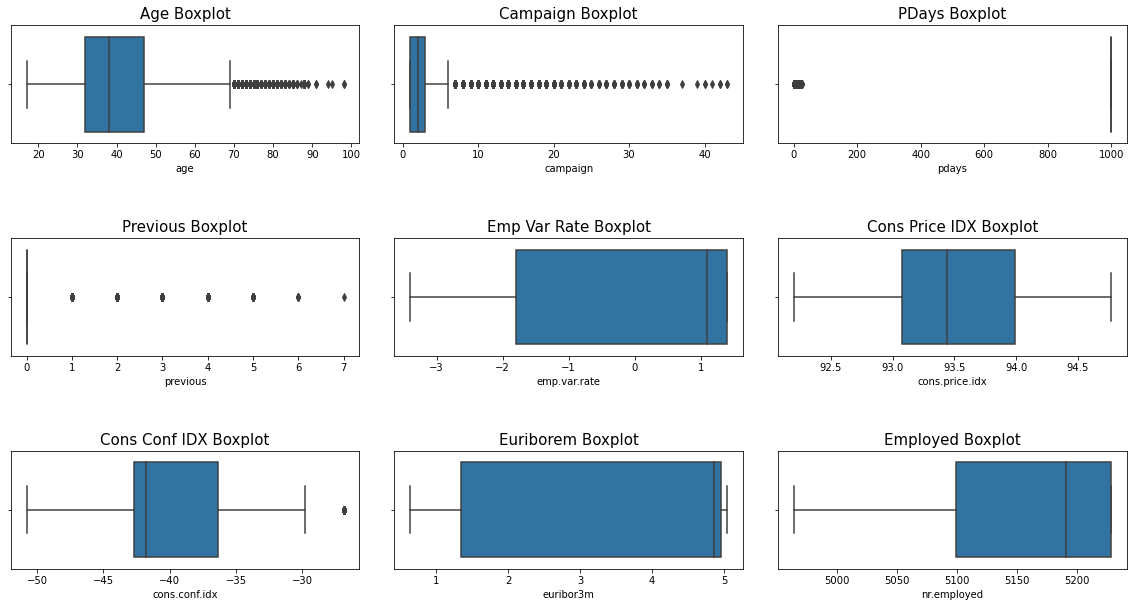

In [45]:
plt.figure(figsize=(20,10))

plt.subplot(331)
sns.boxplot(x=df['age'])
plt.title('Age Boxplot', size=15)

plt.subplot(332)
sns.boxplot(x=df['campaign'])
plt.title('Campaign Boxplot', size=15)

plt.subplot(333)
sns.boxplot(x=df['pdays'])
plt.title('PDays Boxplot', size=15)

plt.subplot(334)
sns.boxplot(x=df['previous'])
plt.title('Previous Boxplot', size=15)

plt.subplot(335)
sns.boxplot(x=df['emp.var.rate'])
plt.title('Emp Var Rate Boxplot', size=15)

plt.subplot(336)
sns.boxplot(x=df['cons.price.idx'])
plt.title('Cons Price IDX Boxplot', size=15)

plt.subplot(337)
sns.boxplot(x=df['cons.conf.idx'])
plt.title('Cons Conf IDX Boxplot', size=15)

plt.subplot(338)
sns.boxplot(x=df['euribor3m'])
plt.title('Euriborem Boxplot', size=15)

plt.subplot(339)
sns.boxplot(x=df['nr.employed'])
plt.title('Employed Boxplot', size=15)

plt.subplots_adjust(wspace=0.1, hspace=0.8)
# plt.savefig('box_plot.png', dpi=100)

plt.show()


#### Insights
- We have abnormal distribution in 'campaign', 'pdays', 'previous', and 'cons.conf.idx' feature
1. campaign = is it okay that we have a number of contacts performed during this campaign distribution like that.
2. pdays = we only have 2 values (999/others) 999 tend to 'no', the rest is 'yes'
3. previous = is it okay that we have a contacs that have been rpreviously performed distribution like that, there is no something strange.
4. cons.conf.idx = It is a consumer index and we do not have any issue on this

To do:
1. classifying the pdays data into yes/no = 1/0

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [47]:
def pcontacted(x):
    if x == 999:
        return 0
    else:
        return 1

df['pdays'] = df['pdays'].apply(pcontacted)
df.rename(columns={"pdays": "pdays"}, inplace=True)
df['pdays'].value_counts()

0    36879
1     1366
Name: pdays, dtype: int64

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

### 3.1.2 Visualize the data using Histogram

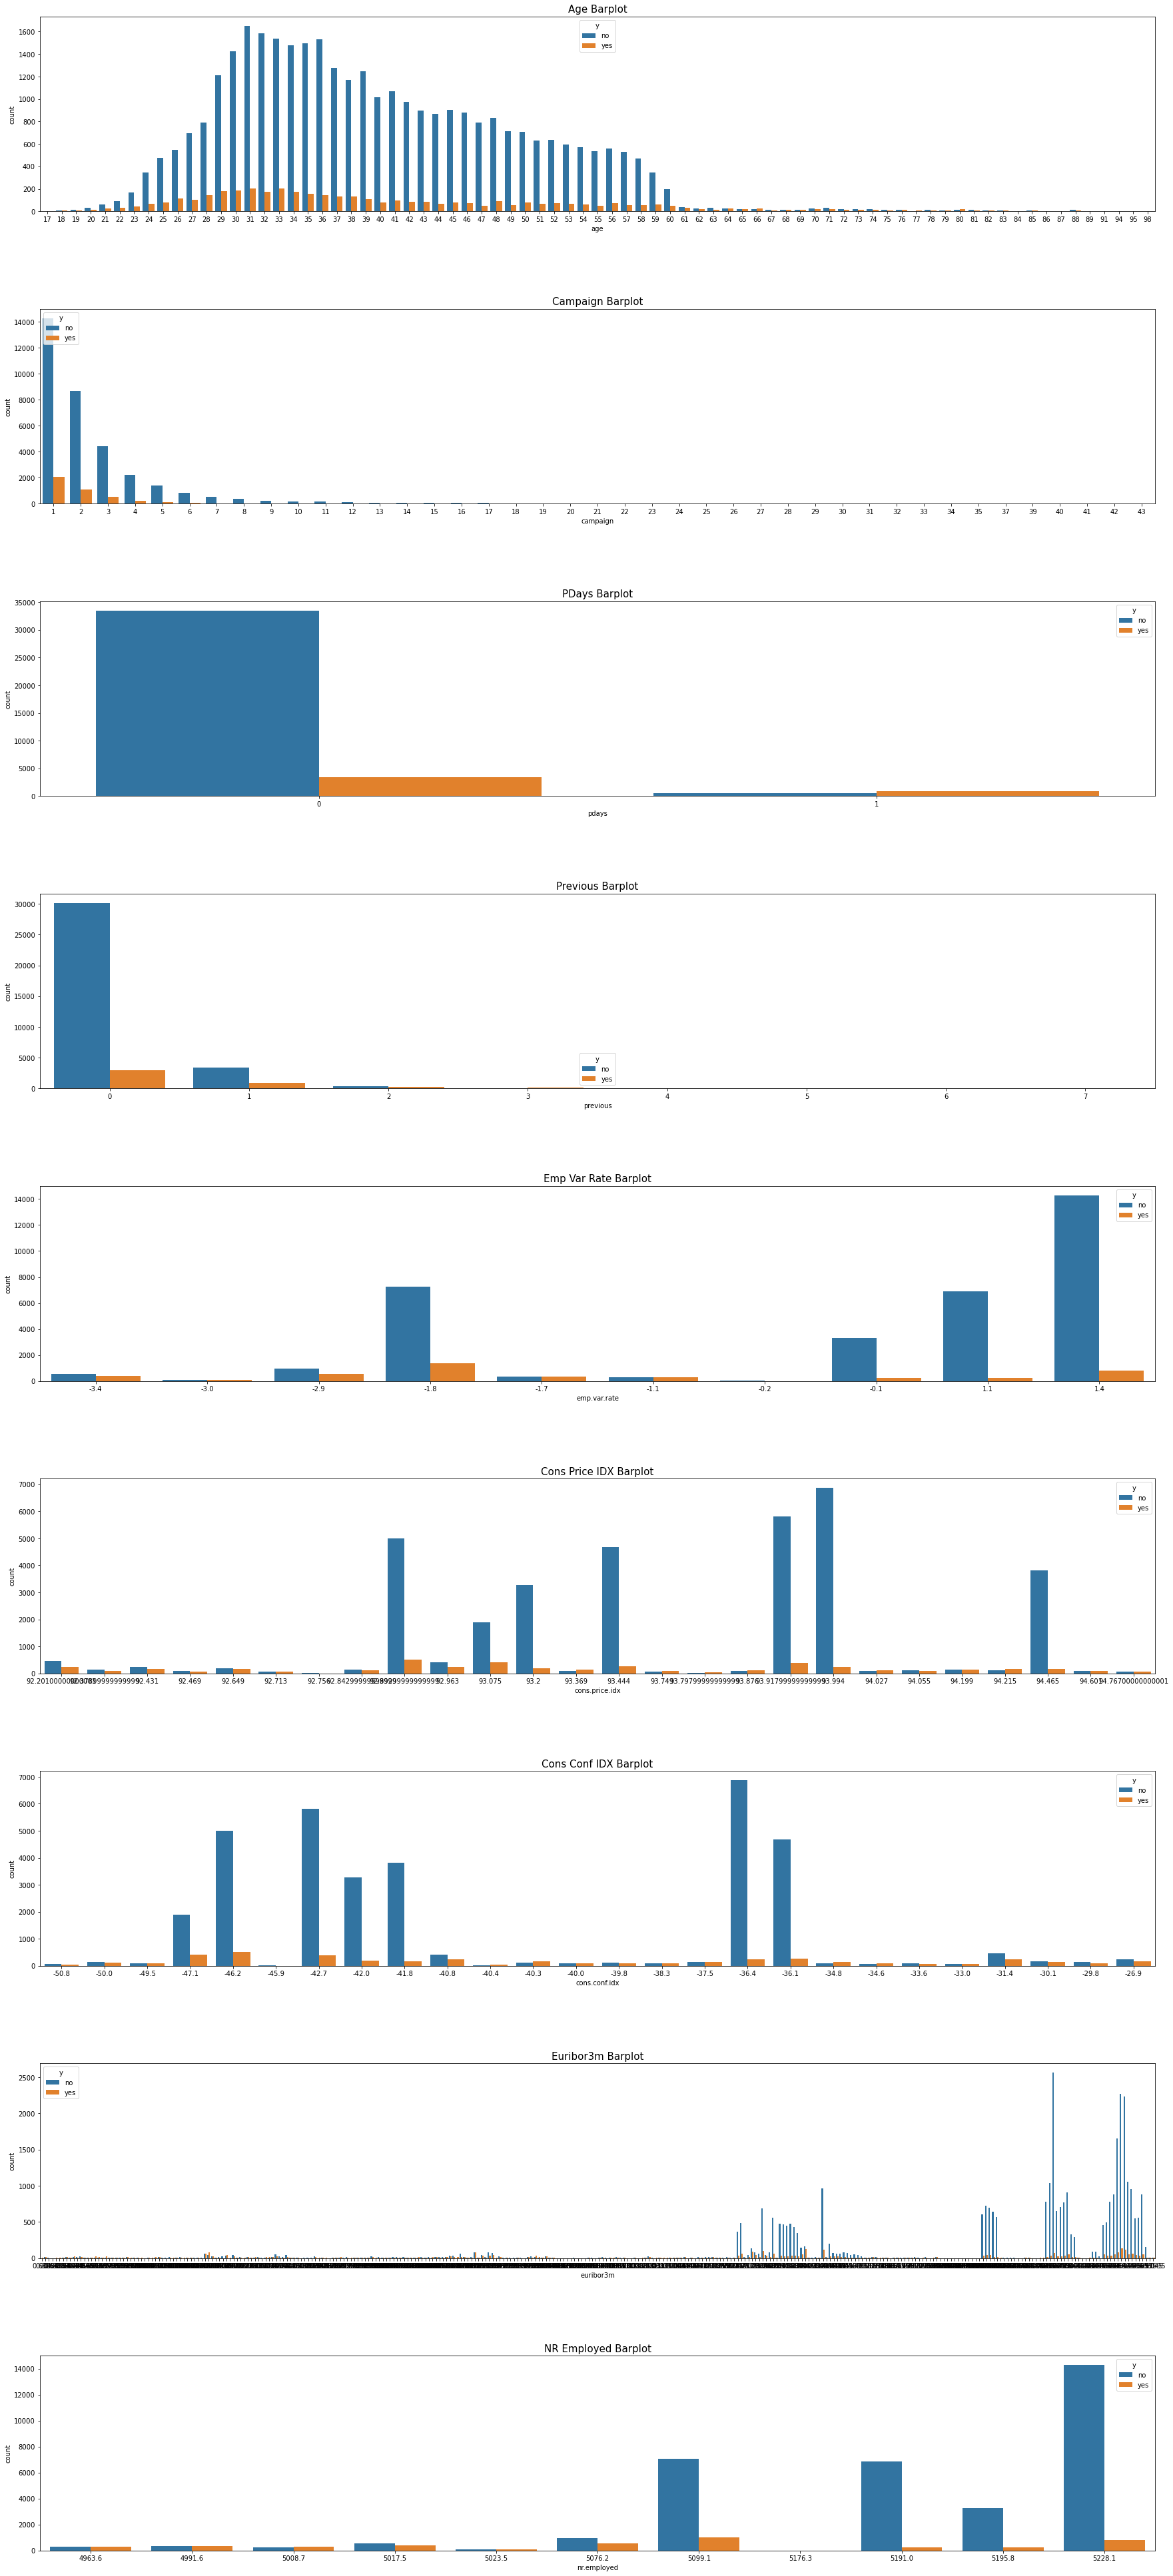

In [49]:
plt.figure(figsize=(30,70))

plt.subplot(911)
sns.countplot(x=df['age'], hue=df['y'])
plt.title('Age Barplot', size=15)

plt.subplot(912)
sns.countplot(x=df['campaign'], hue=df['y'])
plt.title('Campaign Barplot', size=15)

plt.subplot(913)
sns.countplot(x=df['pdays'], hue=df['y'])
plt.title('PDays Barplot', size=15)

plt.subplot(914)
sns.countplot(x=df['previous'], hue=df['y'])
plt.title('Previous Barplot', size=15)

plt.subplot(915)
sns.countplot(x=df['emp.var.rate'], hue=df['y'])
plt.title('Emp Var Rate Barplot', size=15)

plt.subplot(916)
sns.countplot(x=df['cons.price.idx'], hue=df['y'])
plt.title('Cons Price IDX Barplot', size=15)

plt.subplot(917)
sns.countplot(x=df['cons.conf.idx'], hue=df['y'])
plt.title('Cons Conf IDX Barplot', size=15)

plt.subplot(918)
sns.countplot(x=df['euribor3m'], hue=df['y'])
plt.title('Euribor3m Barplot', size=15)

plt.subplot(919)
sns.countplot(x=df['nr.employed'], hue=df['y'])
plt.title('NR Employed Barplot', size=15)


plt.subplots_adjust(wspace=0.1, hspace=0.5)
# plt.savefig('barplot_plot.png', dpi=100) 
plt.show()

In [50]:
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()
numbers

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

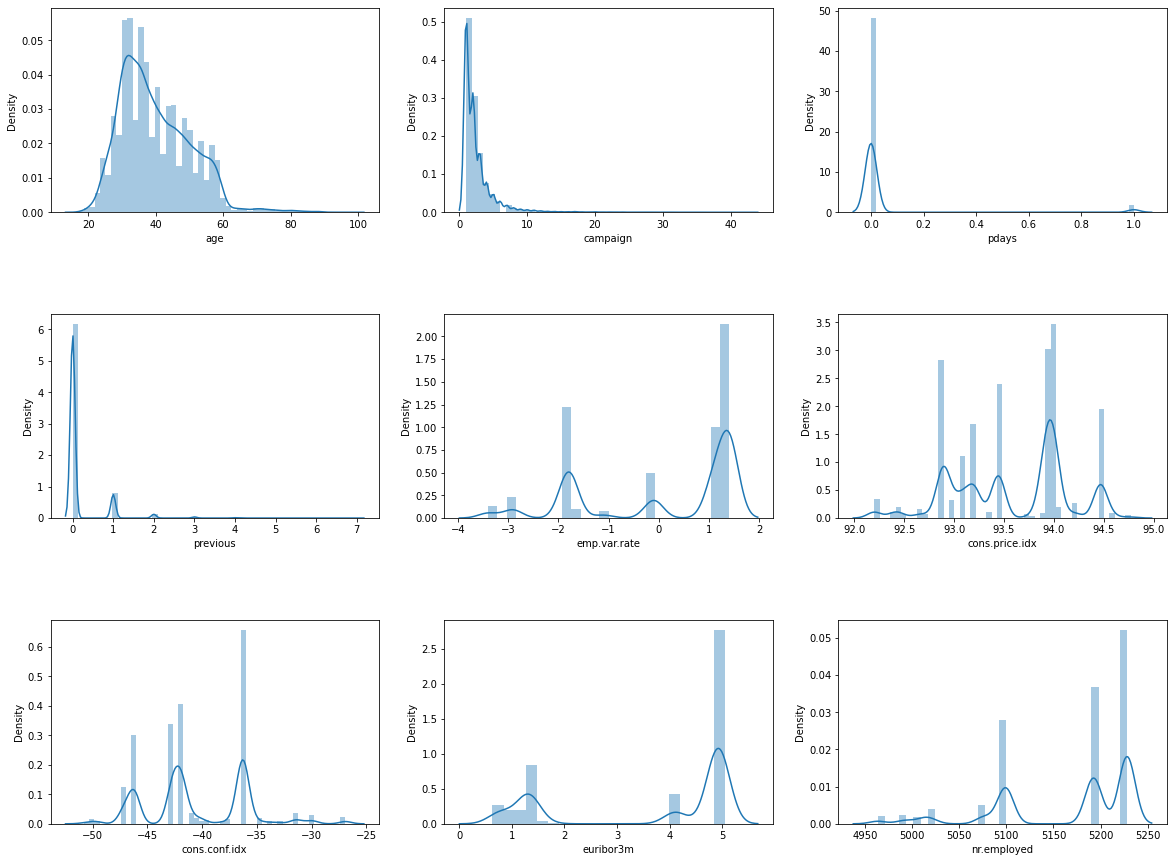

In [51]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
ax = ax.ravel()
position = 0

a = 0
b = 1


while a < len(numbers):
    sns.distplot(df[numbers[a]], ax=ax[position])
    position += 1
    a += 1

plt.subplots_adjust(hspace=0.5)
# plt.savefig('scatt_plot.png', dpi=50)
plt.show()

### 3.1.3 Visualize the data correlation using Heatmap

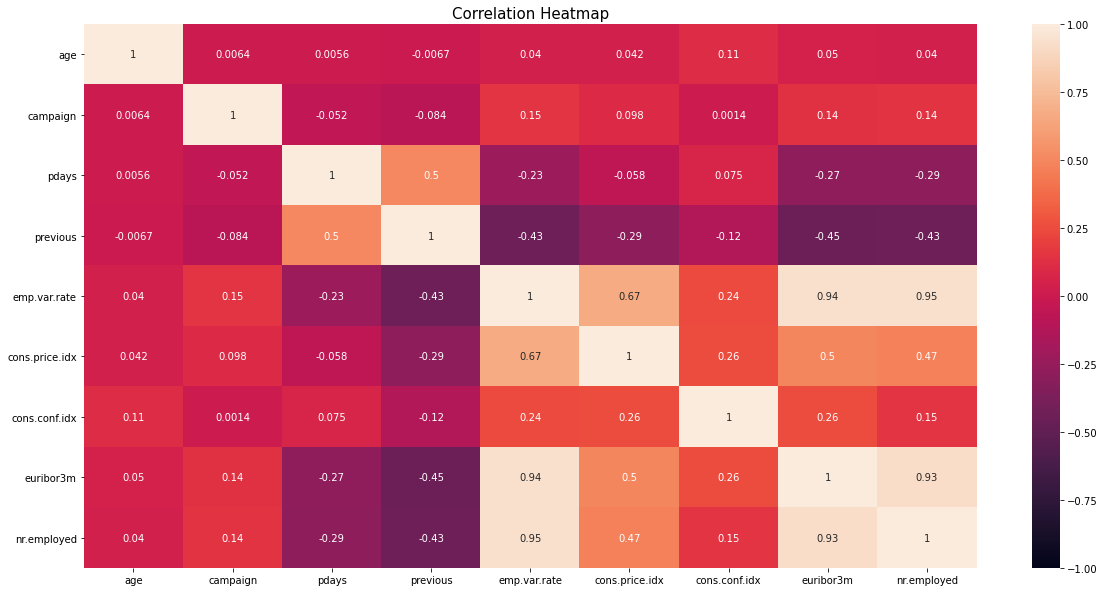

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1,annot=True)
plt.title('Correlation Heatmap', size=15)
# plt.savefig('heatmap_plot.png', dpi=100)
plt.show()

### 3.1.3 Visualize the data correlation using ScatterPlot

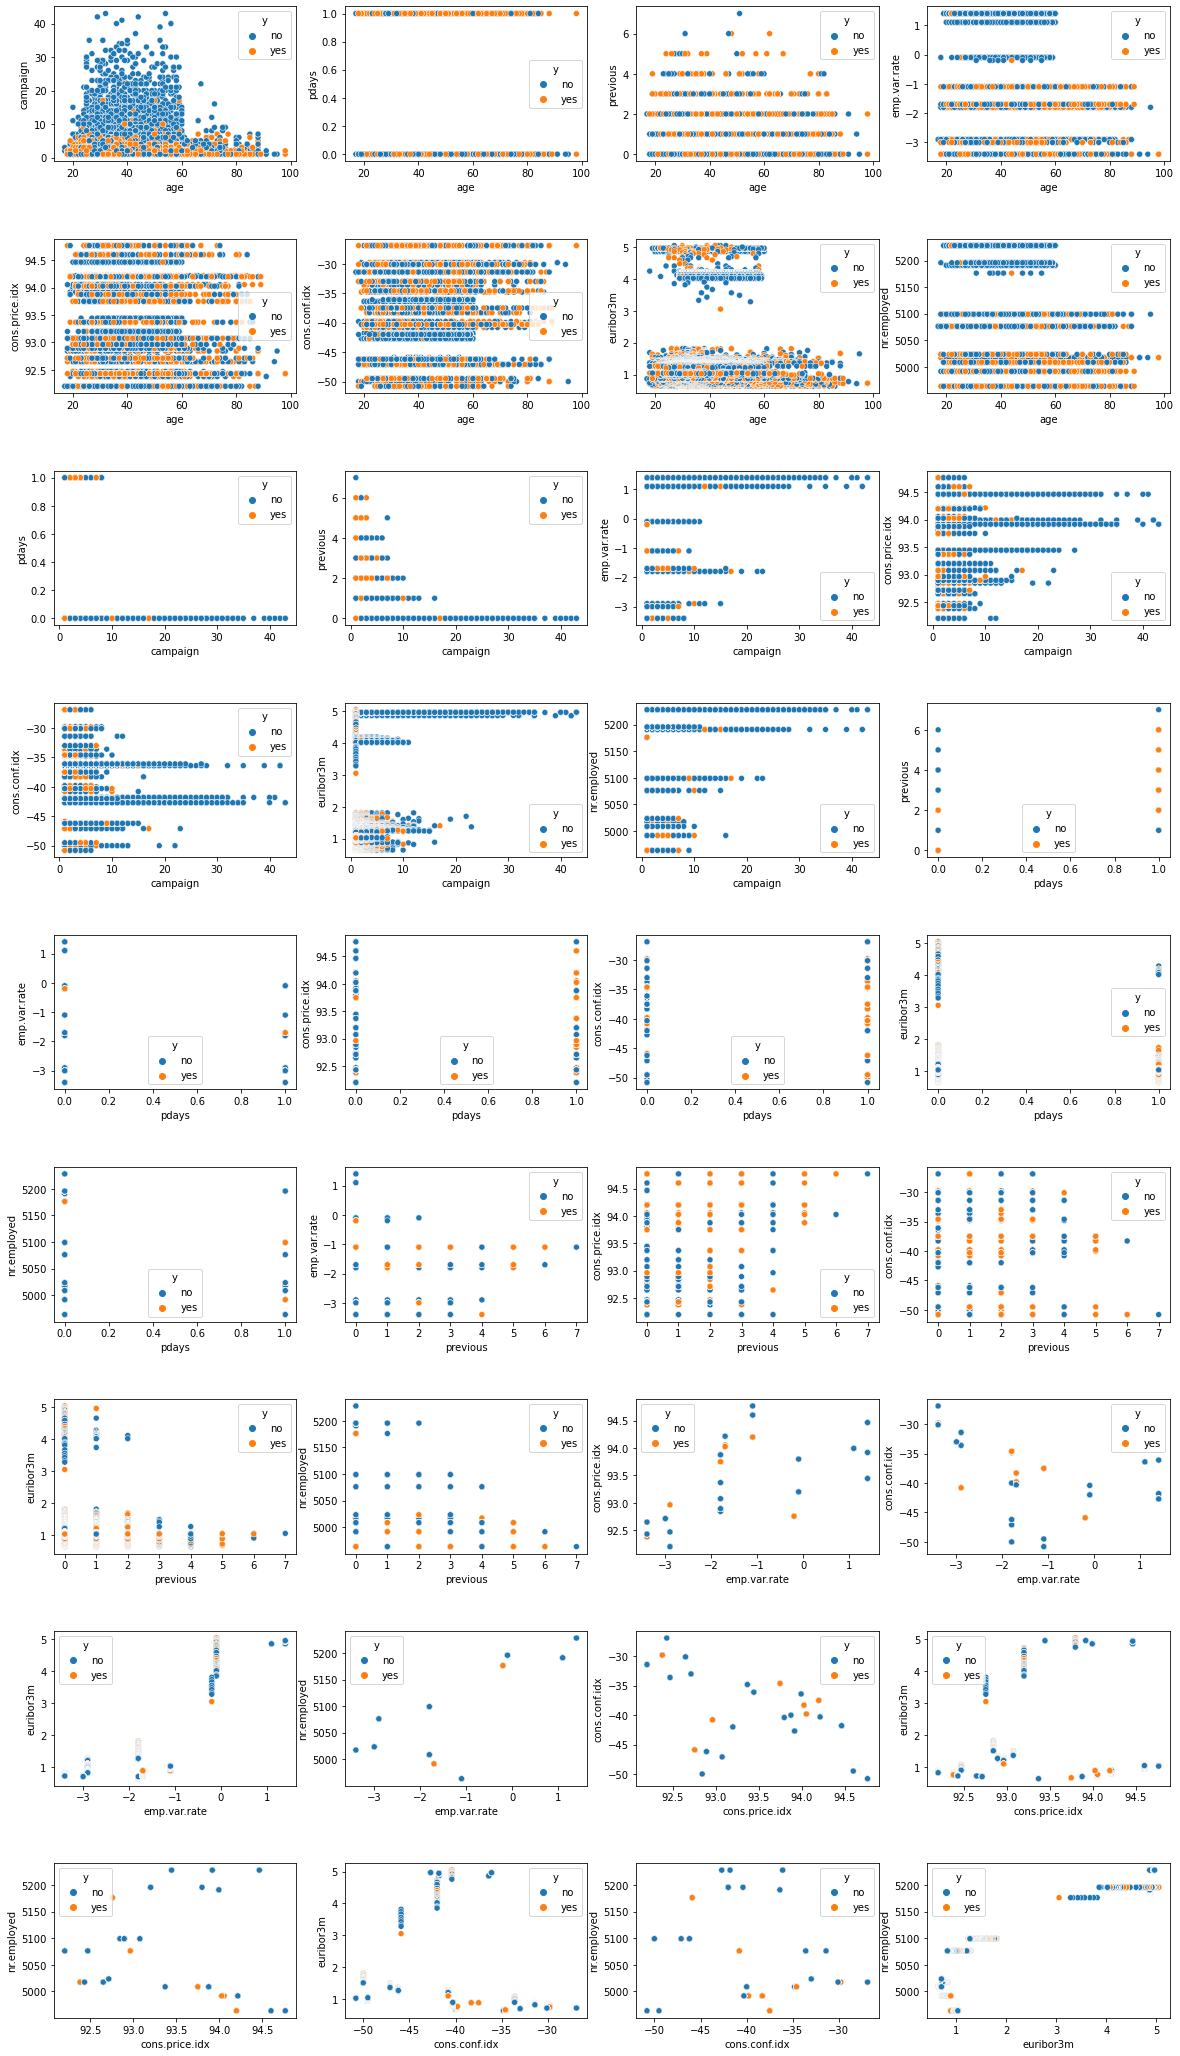

In [53]:
fig, ax = plt.subplots(9,4, figsize=(20,37))
ax = ax.ravel()
position = 0

a = 0
b = 1


while a < len(numbers):
    try:
        sns.scatterplot(x=numbers[a], y=numbers[b], data=df, hue='y', ax=ax[position])
        position += 1
        if b < len(numbers) - 1:
            b += 1
        else:
            a += 1
            b = a + 1
    except:
        break

plt.subplots_adjust(hspace=0.5)
plt.savefig('scatt_plot.png', dpi=50)
plt.show()

#### Insights
1. According 'age' and 'campaign' we have slight correlation that We can gather the customer if We contact the customer less than 10 times (roughly)
2. According 'age' and 'emp.var.rate' the customer tend to say 'no' if the emp.var.rate > 1
3. According 'age' and 'nr.employee', when the nr.employee below < 5100, the customer tend to say 'yes'
4. The rest of features relationships don't show any evident trend

## 3.2 Categorial 

### 3.2.1 Categorical

In [54]:
df.select_dtypes(['object']).columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

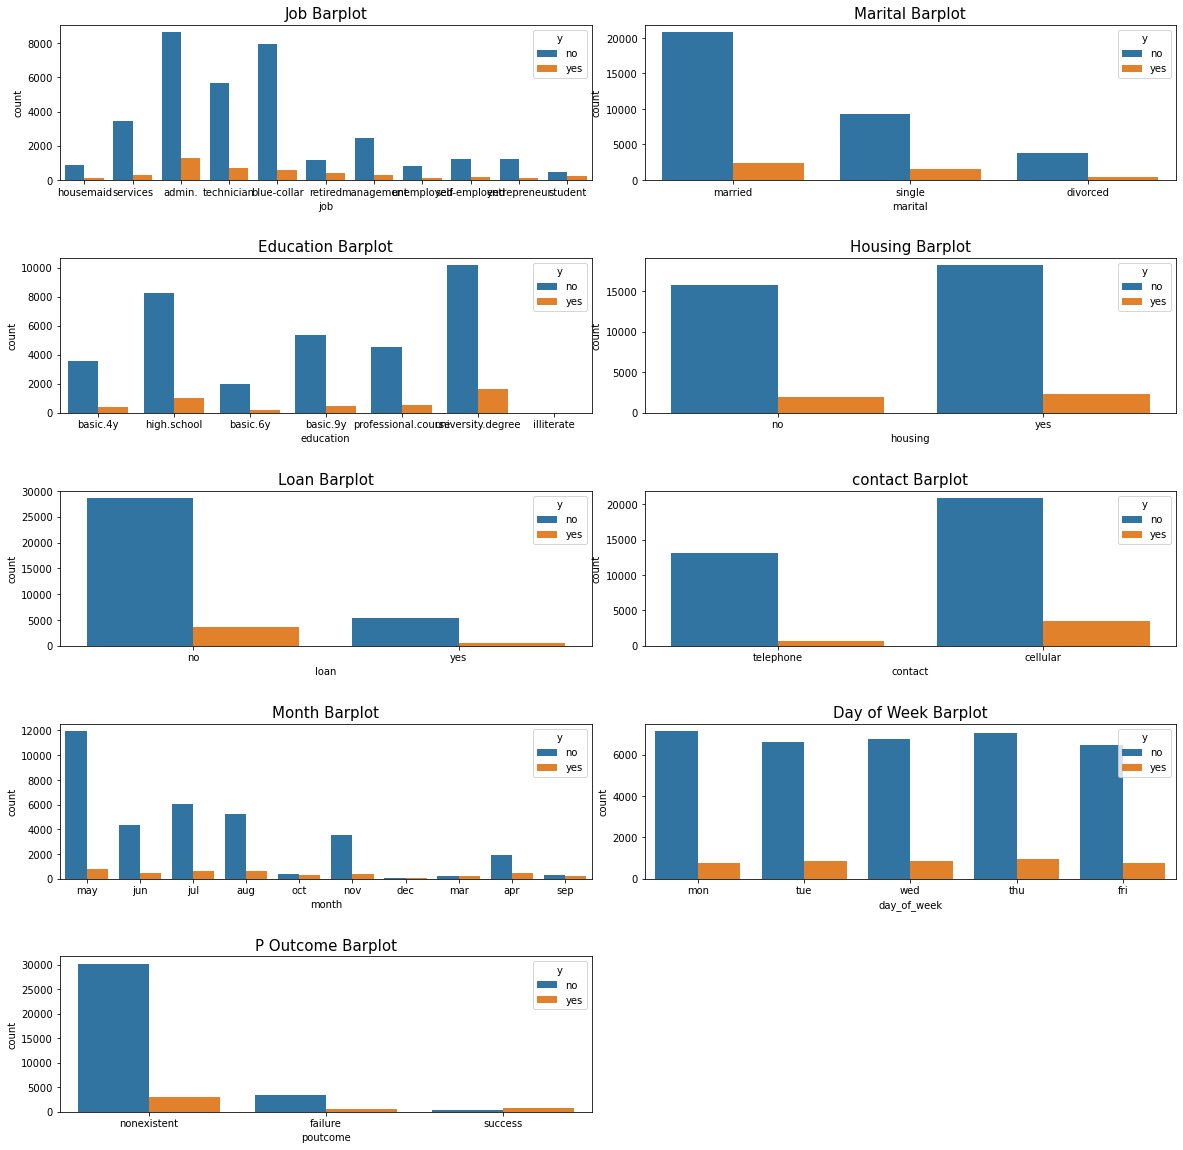

In [55]:
plt.figure(figsize=(20,20))

plt.subplot(521)
sns.countplot(x=df['job'], hue=df['y'])
plt.title('Job Barplot', size=15)

plt.subplot(522)
sns.countplot(x=df['marital'], hue=df['y'])
plt.title('Marital Barplot', size=15)

plt.subplot(523)
sns.countplot(x=df['education'], hue=df['y'])
plt.title('Education Barplot', size=15)

plt.subplot(524)
sns.countplot(x=df['housing'], hue=df['y'])
plt.title('Housing Barplot', size=15)

plt.subplot(525)
sns.countplot(x=df['loan'], hue=df['y'])
plt.title('Loan Barplot', size=15)

plt.subplot(526)
sns.countplot(x=df['contact'], hue=df['y'])
plt.title('contact Barplot', size=15)

plt.subplot(527)
sns.countplot(x=df['month'], hue=df['y'])
plt.title('Month Barplot', size=15)

plt.subplot(528)
sns.countplot(x=df['day_of_week'], hue=df['y'])
plt.title('Day of Week Barplot', size=15)

plt.subplot(529)
sns.countplot(x=df['poutcome'], hue=df['y'])
plt.title('P Outcome Barplot', size=15)


plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.savefig('bar_cat_plot.png', dpi=100)
plt.show()

## Insights
1. 'contact' = We will drop this feature. In my opinion, nowadays it doesn't affect the customer if We contact them by cellular/telephone
2. 'day_of_week- = Wee will drop this feature, as you can see the distribuition of the data are the same between days-to-days

In [56]:
df.drop(['contact', 'day_of_week'], axis=1, inplace=True)

In [57]:
df['y'].value_counts()

no     33987
yes     4258
Name: y, dtype: int64

In [58]:
df['y'].value_counts(normalize=True)

no     0.888665
yes    0.111335
Name: y, dtype: float64

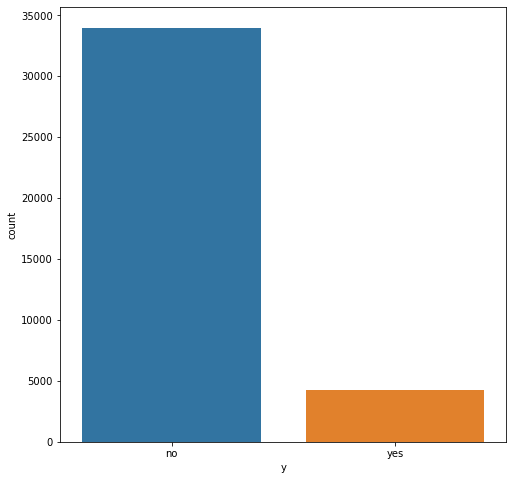

In [59]:
plt.figure(figsize=(8,8))
sns.countplot(df['y'])
plt.show()

## Descriptive Analysis and EDA Conclussions

1. Most of features doesn't show the trend to 'yes'. 
2. We have an imbalanced data between 'yes' and 'no' proportion. yes = 11%, no = 89%

In [60]:
df_pre = df

In [61]:
def label(x):
    if x == 'no':
        return 0
    else:
        return 1

df_pre['label'] = df_pre['y'].apply(label)
df.drop(columns=['y'], axis=1, inplace=True)

In [62]:
df_pre.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'label'],
      dtype='object')

In [63]:
df_pre.head()

,age,job,marital,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [64]:
# df_pre.to_csv('campaign_clean.csv')

In [65]:
# df_c.to_csv('campaign_clean.csv')

# 

# 